In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append("../src")
from stochastic_glv_generator import glv, euler_maruyama, sort_glv_params, sort_glv_params_A_x_eq

100%|██████████| 10000/10000 [00:01<00:00, 5605.66it/s]


-0.3670873730348075


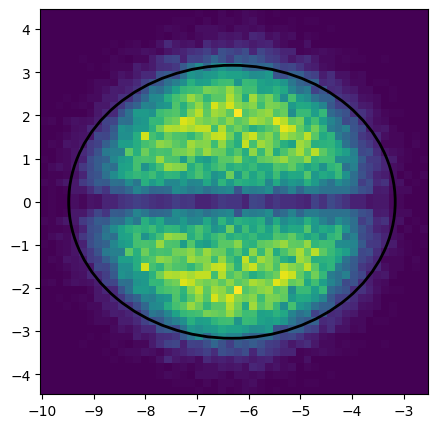

In [2]:
np.random.seed(0)

eigvals_real = []
eigvals_imag = []

n = 10

for i in tqdm(range(10000)):
    a = np.random.normal(size=(n,n))
    a -= np.eye(a.shape[0])*(a+2*n**0.5)

    # eigvals = np.linalg.eig(a)[0]
    # if eigvals.real.max() >= 0:
    #     a -= np.eye(a.shape[0])*eigvals.real.max()*1.1
    
    eigvals = np.linalg.eig(a)[0]
    eigvals_real = np.concatenate((eigvals_real, eigvals.real))
    eigvals_imag = np.concatenate((eigvals_imag, eigvals.imag))

print(eigvals_real.max()/n**0.5)
plt.figure(figsize=(5,5))
# plt.scatter(eigvals_real, eigvals_imag)
plt.hist2d(eigvals_real[eigvals_imag!=0], eigvals_imag[eigvals_imag!=0], 50)

circle = plt.Circle((-2.*n**0.5,0), n**0.5, facecolor="none", edgecolor="k", lw=2)
plt.gca().add_patch(circle)

plt.vlines(0, -n**0.5, n**0.5, color="k", ls="--", lw=2)

plt.show()

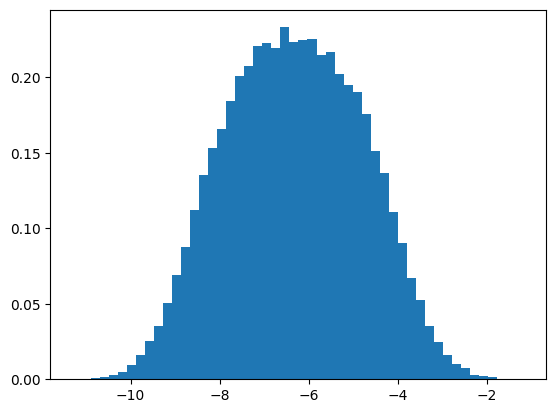

In [3]:
plt.hist(eigvals_real, 50, density=True)
plt.show()

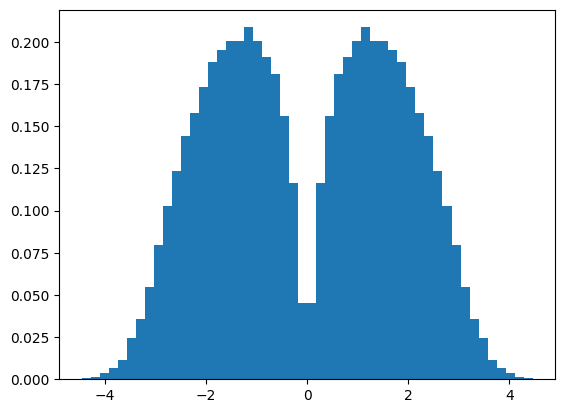

In [4]:
plt.hist(eigvals_imag[eigvals_imag!=0], 50, density=True)
plt.show()

In [5]:
eigvals_real = np.zeros((20, 1000*n))

for m in range(20):
    for i in range(1000):
        a = np.random.normal(size=(n,n))
        a -= np.eye(a.shape[0])*(a+np.abs(np.random.normal(size=n)*m))
        eigvals_real[m,i*n:(i+1)*n] = np.linalg.eig(a)[0].real

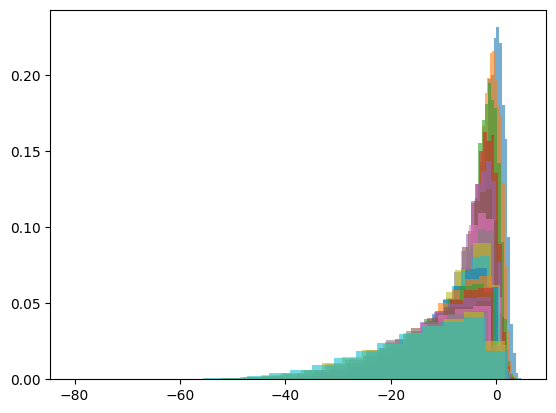

In [6]:
for m in range(20):
    plt.hist(eigvals_real[m], bins=20, alpha=0.6, density=True)
plt.show()

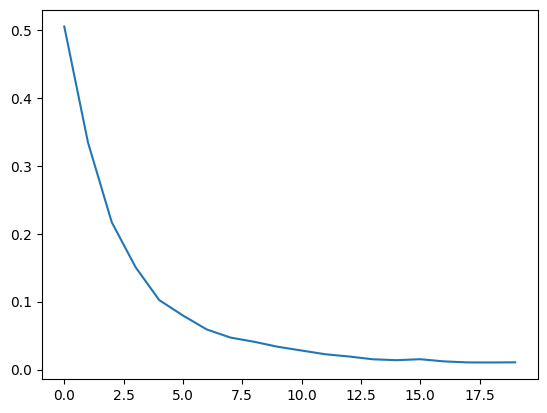

In [7]:
plt.plot((eigvals_real>0).mean(1))

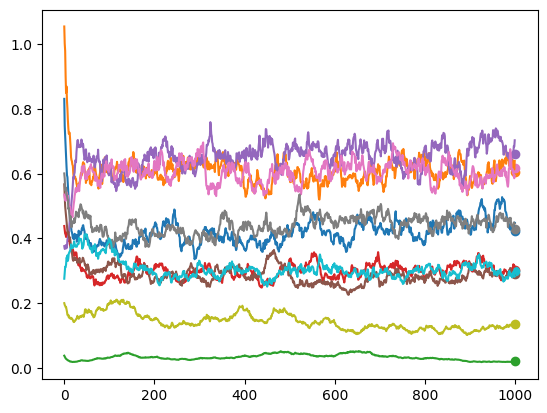

In [8]:
np.random.seed(0)

n = 10

a = np.random.normal(size=(n,n))
a -= np.eye(a.shape[0])*(a+1*n**0.5)
# a -= np.eye(a.shape[0])*(a+np.abs(np.random.normal(size=n)*3))

x_eq = np.random.uniform(0, 1, n)

r = -a@x_eq

traj = euler_maruyama(glv, 0, x_eq*np.random.normal(1, 0.5, x_eq.shape), np.concatenate((r, a.flatten())), 0.1, 1e-4, np.linspace(0, 40, 1000), 0)

plt.plot(traj)
for i in range(n):
    plt.scatter(1000, x_eq[i])

plt.show()

In [46]:
np.linalg.eig(x_eq*A)[0].real

array([-2.40231491e+00, -1.60322372e+00, -1.60322372e+00, -1.12909299e+00,
       -1.12909299e+00, -4.36865715e-01, -4.36865715e-01, -7.04310779e-01,
       -3.79144328e-01, -5.04336418e-04])

In [56]:
traj[0]

array([0.05757846, 0.86335489, 0.35666636, 1.19734976, 0.39668248,
       0.17681705, 0.08380897, 0.32455408, 0.24212843, 0.        ])

In [102]:
traj[0]

array([1.09995711, 0.52254973, 1.03236172, 0.69979367, 0.72620022,
       0.25352481, 0.94215874, 0.00546198, 0.27115344, 0.45725111])

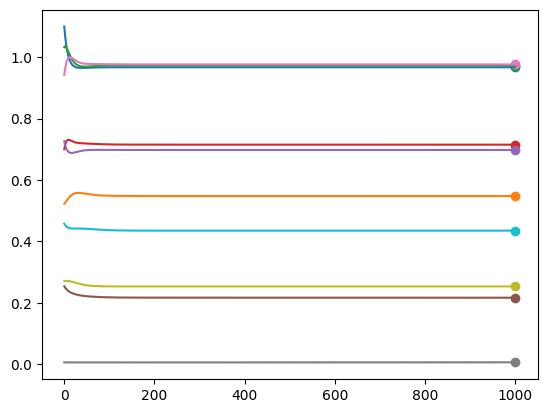

In [100]:
n = 10

x_eq, p = sort_glv_params_A_x_eq(n, 4, 1, n**0.5, 0.1, 1)

r = p[:n]
A = p[n:].reshape((n,n))

traj = euler_maruyama(glv, 0, x_eq*np.random.normal(1, 0.1, x_eq.shape), p, 0., 1e-3, np.linspace(0, 40, 1000), 1)

plt.plot(traj)
for i in range(n):
    plt.scatter(1000, x_eq[i])

plt.show()